In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [33]:
cancer = load_breast_cancer()

In [34]:
type(cancer)

sklearn.utils.Bunch

In [35]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [37]:
print(cancer['target_names'])

['malignant' 'benign']


In [38]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [39]:
cancer_df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], 'target'))

In [40]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


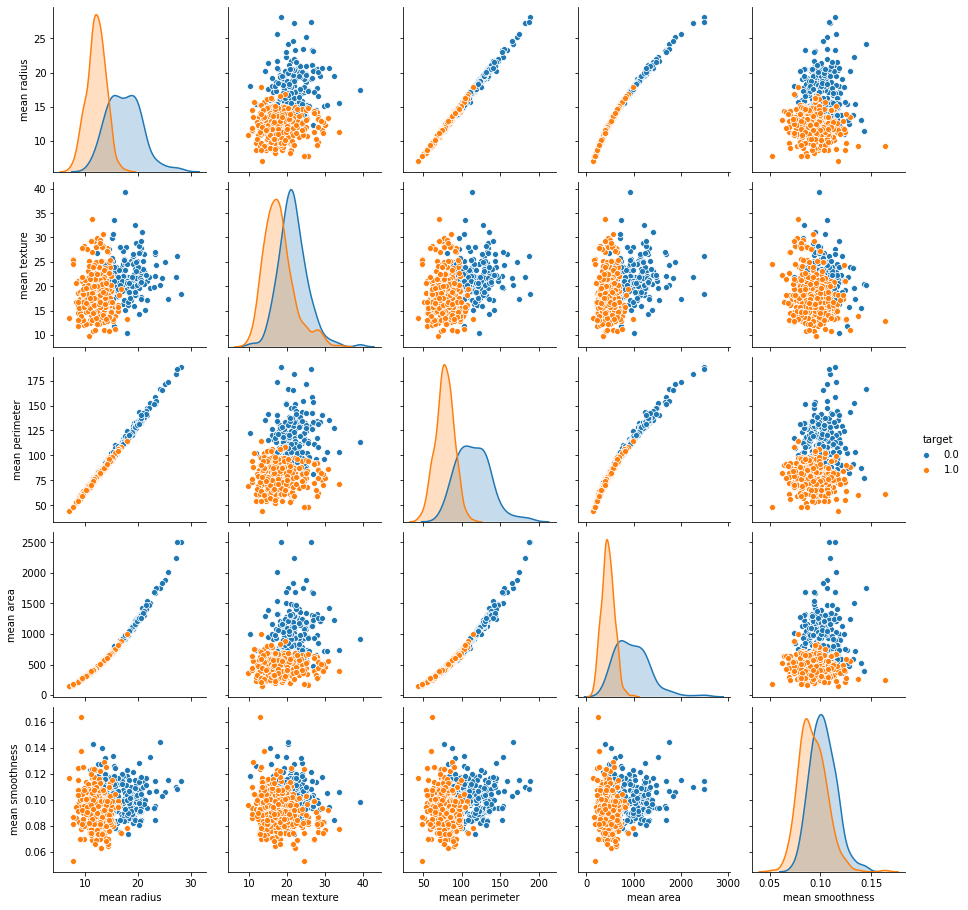

In [41]:
sns.pairplot(cancer_df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness'])

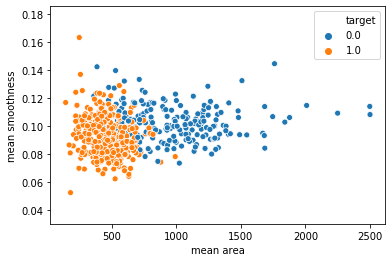

In [42]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=cancer_df)

In [43]:
import matplotlib.pyplot as plt

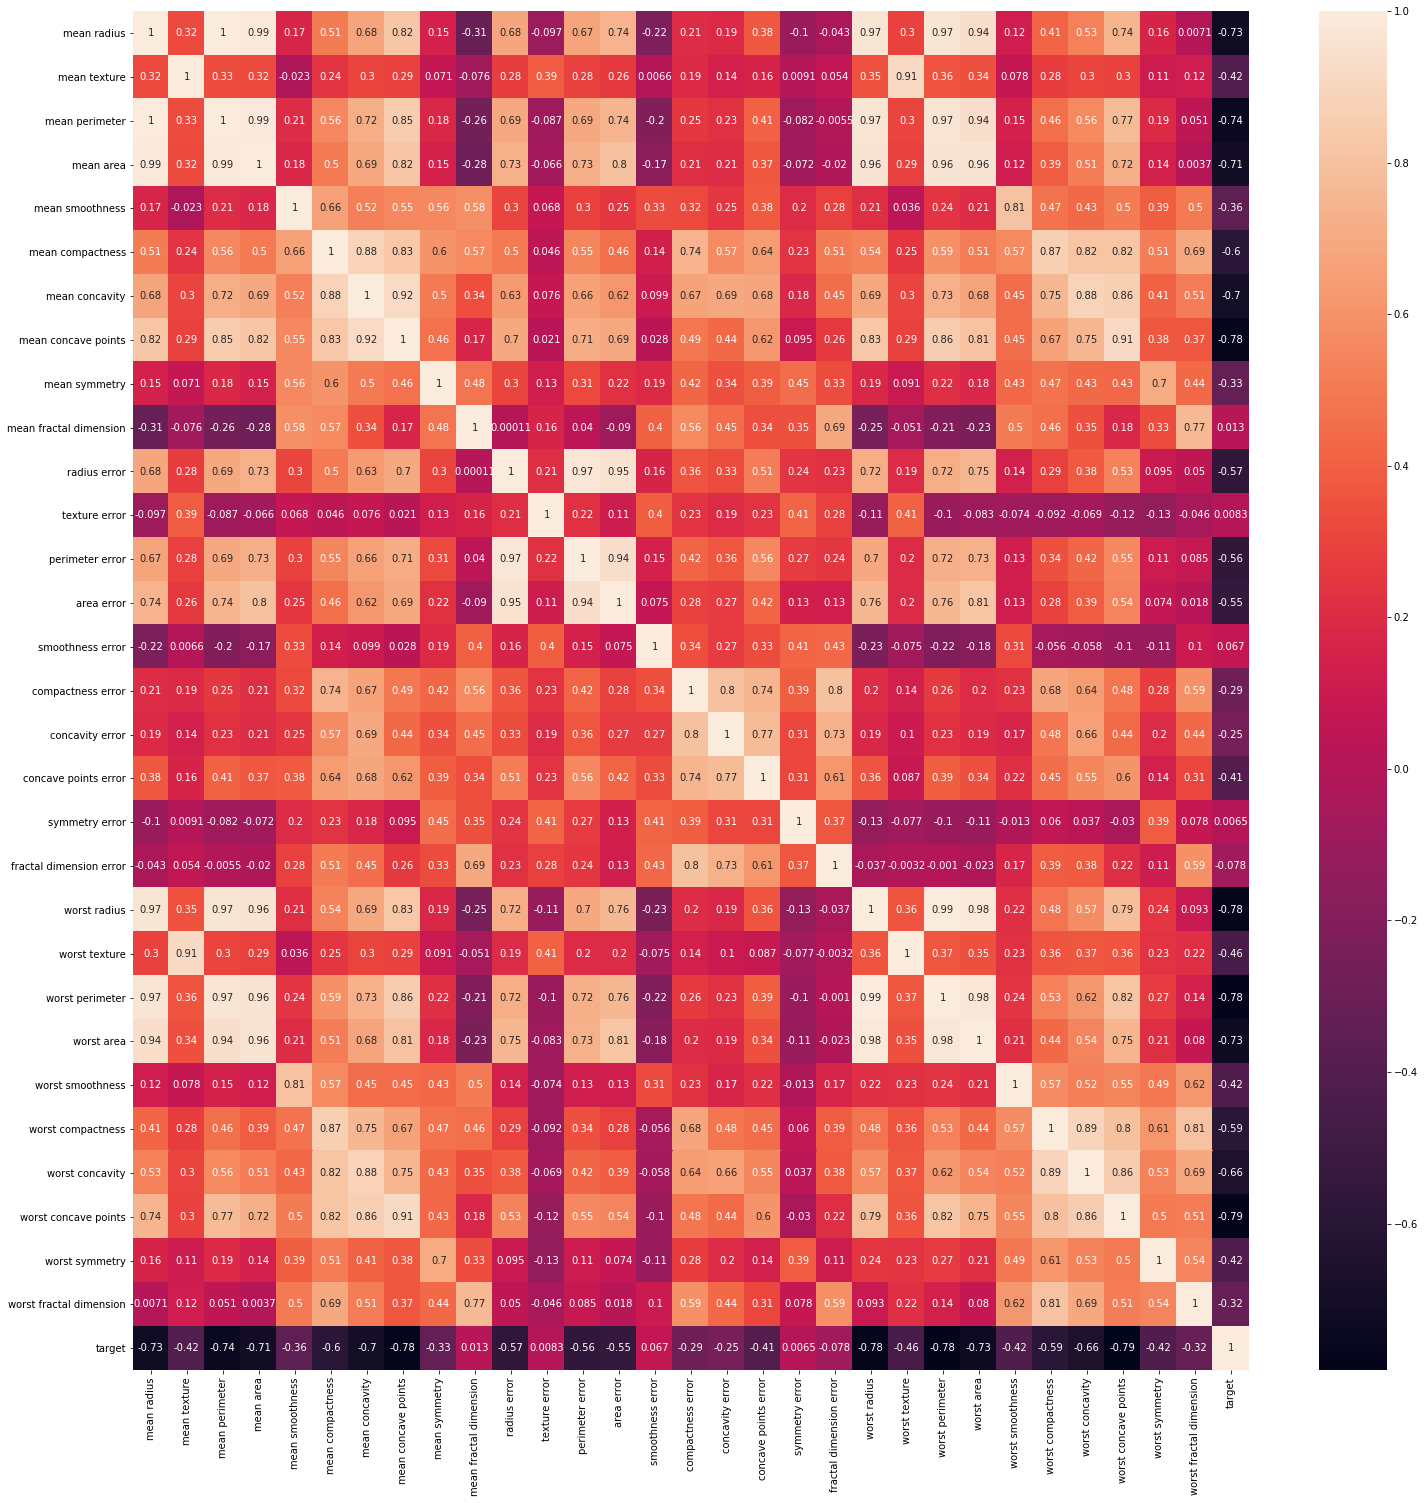

In [44]:
plt.figure(figsize=(25, 25))
sns.heatmap(cancer_df.corr(), annot=True, fmt='.2g')
plt.show()

In [45]:
X = cancer_df.drop(['target'], axis=1)
y = cancer_df['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
svc_model = SVC()

In [48]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_predict = svc_model.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_predict)

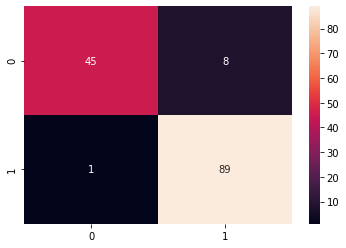

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91        53
         1.0       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [53]:
min_train_data = X_train.min()
range_train_data = (X_train - min_train_data).max()
X_train_scaled = (X_train - min_train_data)/range_train_data

In [54]:
min_test_data = X_test.min()
range_test_data = (X_test - min_test_data).max()
X_test_scaled = (X_test - min_test_data)/range_test_data

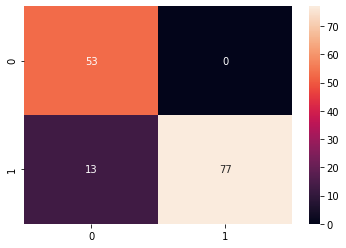

In [55]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [56]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

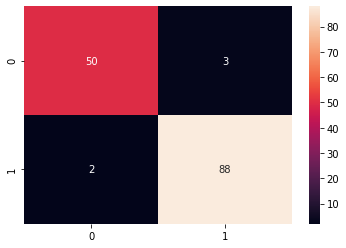

In [57]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        53
         1.0       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



# or

In [60]:
X = cancer_df.drop(['target'], axis=1)
y = cancer_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_predict = svc_model.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, y_predict)

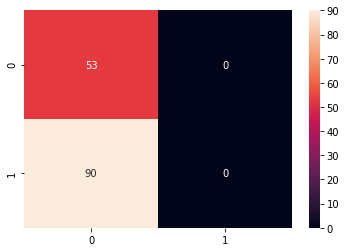

In [63]:
sns.heatmap(cm, annot=True)

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.37      1.00      0.54        53
         1.0       0.00      0.00      0.00        90

    accuracy                           0.37       143
   macro avg       0.19      0.50      0.27       143
weighted avg       0.14      0.37      0.20       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
min_train_data = X_train.min()
range_train_data = (X_train - min_train_data).max()
X_train_scaled = (X_train - min_train_data)/range_train_data

In [66]:
min_test_data = X_test.min()
range_test_data = (X_test - min_test_data).max()
X_test_scaled = (X_test - min_test_data)/range_test_data

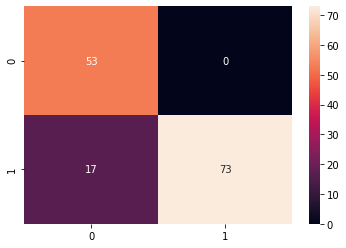

In [67]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_predict = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [68]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

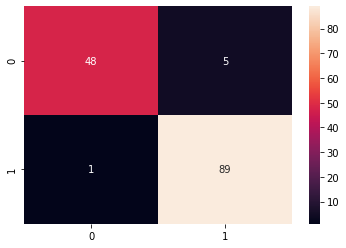

In [69]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_predict = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        53
         1.0       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
#direct

In [71]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(random_state=0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        53
         1.0       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

